# Lab 06: Learning About Adults and Flowers

### Author: Declan Sheehan & Jack Stoetzel 

### Date: November 24, 2020

### Objectives:
1. Work on developing some simple supervised machine learning algorithms
2. Practice visualizing and presenting the behavior of a complex algorithm on data
3. Continue developing skills with Python, Jupyter notebooks, and data-processing libraries


In [1]:
import os
import math
import random
import operator
import pylab as pl
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

In [2]:
class kNN:
    def __init__(self, train_data, full_data, labels, k):
        super().__init__()
        self.k = k
        self.labels = labels
        self.distance = None
        self.train(train_data, full_data)
        
    def train(self, train_data, full_data):
        self.full_data = full_data
        self.train_data = train_data
        self.train_size = train_data.shape[0]
        
    def distances(self, sample):
        diffMatrix = tile(sample, (self.train_size, 1)) - self.train_data
        self.distance = ((diffMatrix ** 2).sum(axis = 1) ** 0.5)
        

    def predict(self, sample):
        self.distances(sample)
        sortedIndices = self.distance.argsort()
        
        label_count = []
        for i in range(len(self.labels)):
            label_count.append(0)
        
        Class = ''
        for num in range(self.k):
            votedPoints = sortedIndices[num]
            for label in self.labels:
                if self.full_data[votedPoints][2] == label:
                    label_count[self.labels.index(label)] += 1
                
        values = array(label_count).argsort()
        Class = self.labels[values[2]]
        
        self.print_plot(sample)
        return Class
    
    def print_plot(self, sample):
        plots = []
        for i in range(len(self.labels)):
            plots.append(([], []))
        
        for num in range(self.train_size):
            plots[self.labels.index(self.full_data[num][2])][0].append(self.train_data[num][0])
            plots[self.labels.index(self.full_data[num][2])][1].append(self.train_data[num][1])
                
        plt.figure(figsize=(10, 10))
        for sett in plots:
            plt.scatter(sett[0], sett[1])
            
        plt.scatter(sample[0], sample[1])
        plt.scatter(sample[0], sample[1], s=25000, facecolors='none', edgecolors='r')
        plt.legend(self.labels)
        plt.show()

# Generates a given number of points from (0.0, 0.0) to (50.0, 50.0)
# and gives them a color based on positioning.
def generate_data(size):
    full_data = []
    part_data = []
    for i in range(size):
        x = random.uniform(0, 50)
        y = random.uniform(0, 50)

        if x >= 24 and y <= 24:
            full_data.append([x, y, 'blue'])
        elif x <= 24 and y >= 24:
            full_data.append([x, y, 'yellow'])
        else:
            full_data.append([x, y, 'green'])
        part_data.append([x, y])
    return full_data

# Task 3 split data method.
def splitData(full_data, p):
    random.shuffle(full_data)
    n = len(full_data)
    training, full, testing = [], [], []
    for num in range(math.floor(int(n * (1 - p)))):
        testing.append(full_data[num][:-1])
    for num in range(math.floor(int(n * p))):
        training.append(full_data[num + math.floor(int(n * (1 - p)))][:-1])
        full.append(full_data[num + math.floor(int(n * (1 - p)))])
                   
    return training, testing, full

# For reformatting a data from into an array for the kNN class
def reformat(frame):
    full_data = []
    for i in frame.values:
        full_data.append([i[0], i[1], i[2]])
    return full_data



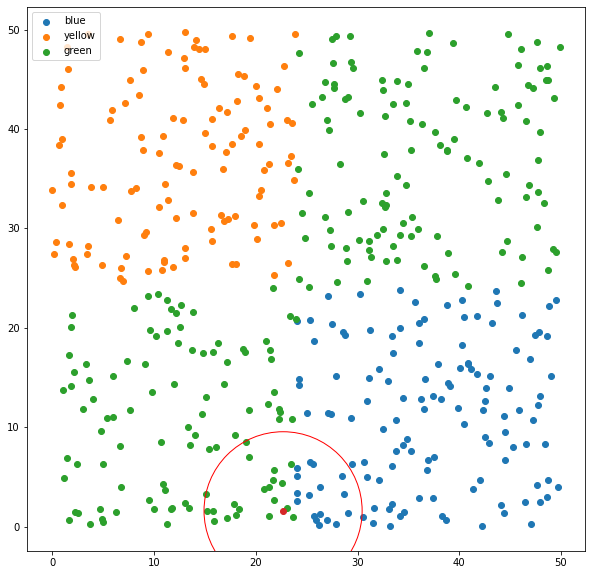

Point 22.685464387715694 , 29.86049117616091 is green


In [3]:
# Generate and split the data.
full_data = generate_data(500)
training_data, testing_data, full_data = splitData(full_data, 0.95)

# Test the data and print out a result.
model = kNN(array(training_data), array(full_data), ['blue', 'yellow', 'green'], 25)
prediction = model.predict(array(testing_data[0]))
print('Point', testing_data[0][0], ',', testing_data[1][0], 'is', prediction)

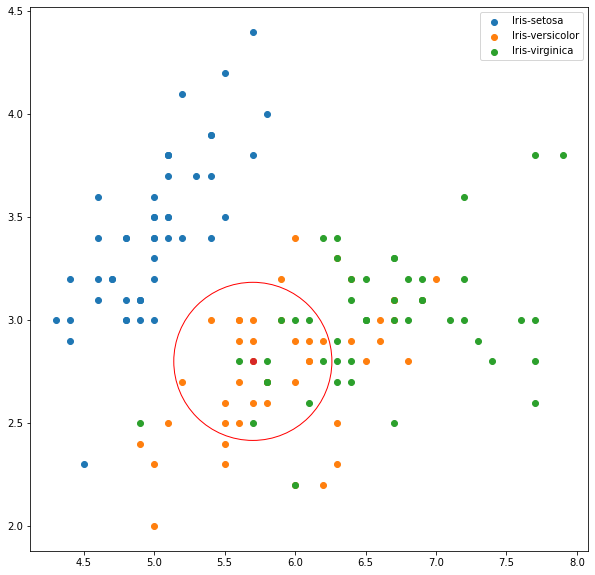

Point 5.7 , 6.4 is Iris-versicolor


In [4]:
iris = pd.read_csv('./iris.data',
                      header=None,
                      skipinitialspace=True,
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
                     )

sepals = iris[["sepal_length", "sepal_width", "class"]]

full_data = reformat(sepals)

training_data, testing_data, full_data = splitData(full_data, 0.95)

iris_model = kNN(array(training_data), array(full_data), ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], 25)

prediction = iris_model.predict(array(testing_data[0]))
print('Point', testing_data[0][0], ',', testing_data[1][0], 'is', prediction)